In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

El EDA se hace bajo el enfoque de saber que el modelo por excelencia al realizar una recomendacion es la similitud del coseno, y se deduce que las columnas más importantes para el sistema de recomendaciones son “titulo” y “overview”, es esa linea el wordcloud de las palabras, nos dará un mayor contexto.

In [7]:
df_movies=pd.read_csv("../DatosProcesados/movies.csv")

Exploración Inicial:

In [8]:
df_movies.sample(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,release_year,return,title
33280,NaN,0.0,"Science Fiction, Comedy, Horror",218784,en,"In the town of Dillford, humans, vampires and ...",8.515073,"Columbia Pictures, Sony Pictures Entertainment",United States of America,2015-10-30,70958.0,92.0,English,Released,Get out undead or alive.,5.7,146.0,2015,0.0,Freaks of Nature


In [9]:
df_movies.shape

(44346, 20)

Manejo de Valores Faltantes:

In [10]:
df_movies.isna().mean()

belongs_to_collection    0.900307
budget                   0.000000
genres                   0.048122
id                       0.000000
original_language        0.000225
overview                 0.000000
popularity               0.000000
production_companies     0.253168
production_countries     0.133428
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
spoken_languages         0.082127
status                   0.001443
tagline                  0.540996
vote_average             0.000000
vote_count               0.000000
release_year             0.000000
return                   0.000000
title                    0.000000
dtype: float64

In [11]:
df_movies= df_movies.drop(columns=['belongs_to_collection','tagline'])

In [12]:
df_movies=df_movies.dropna(subset=['overview'])
df_movies=df_movies.dropna(subset=['genres'])

In [13]:
df_movies.drop(columns='id').describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.221200e+04,42212.000000,4.221200e+04,42212.000000,42212.000000,42212.000000,42212.000000,4.221200e+04
mean,4.529042e+06,3.110293,1.204541e+07,96.088411,5.712385,117.881835,1991.941391,7.095142e+02
std,1.800850e+07,6.185579,6.665988e+07,35.901294,1.783027,508.925409,24.021671,7.744187e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.466071,0.000000e+00,86.000000,5.100000,4.000000,1978.000000,0.000000e+00
50%,0.000000e+00,1.259955,0.000000e+00,95.000000,6.000000,11.000000,2001.000000,0.000000e+00
75%,0.000000e+00,4.124388,0.000000e+00,107.000000,6.800000,38.000000,2011.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


### Análisis de valores cualitativos

Vizualizar las "wordcloud" generadas con Overview & Titles:

Overview

In [14]:
overviews = ' '.join(df_movies['overview'])

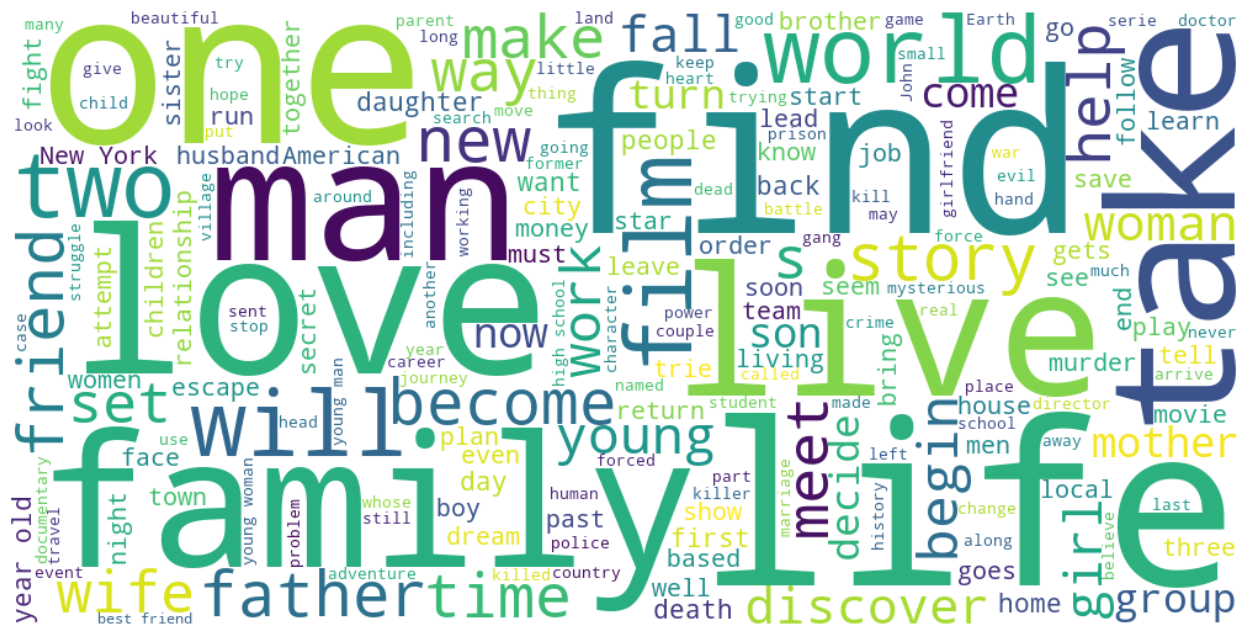

In [15]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS,width=1000, height=500, background_color='white').generate(overviews)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Titles

In [16]:
titles = ' '.join(df_movies['title'])

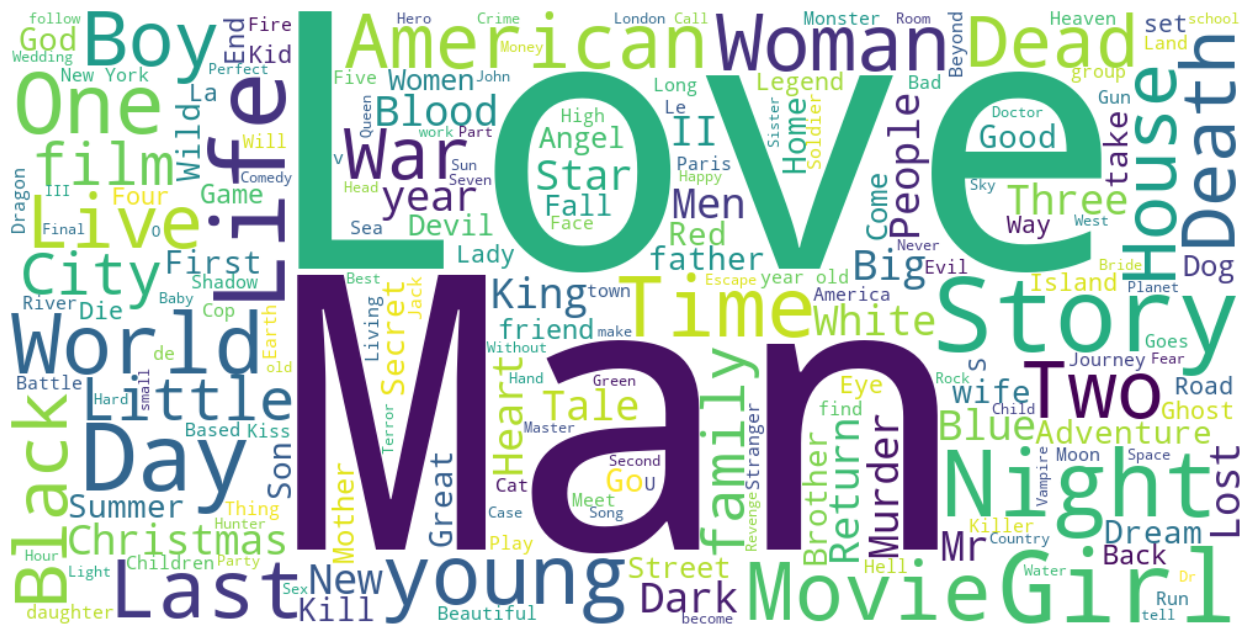

In [17]:
titles_wordcloud = WordCloud(stopwords=STOPWORDS,width=1000, height=500, background_color='white').generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(titles_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Genres

In [18]:
#Eliminar espacios entre los generos
df_movies['genres'] = df_movies['genres'].str.replace(r'\s*,\s*', ',', regex=True)

In [19]:
lista_generos=[]
for i in df_movies['genres']:
    lista_generos.append(i)

In [20]:
generos = set()  # Conjunto para almacenar palabras únicas

for cadena in lista_generos:
    palabras = cadena.split(',')  # Dividir la cadena en palabras
    generos.update(palabras)  #Unicos
generos_list=list(generos)

In [21]:
conteo_por_genero = {genero: 0 for genero in generos_list}

In [22]:
for lista_generos in df_movies['genres']:
    if isinstance(lista_generos, str):
        for genero in lista_generos.split(','):
            conteo_por_genero[genero] += 1

In [23]:
conteo_por_genero = dict(sorted(conteo_por_genero.items(), key=lambda item: item[1],reverse=True))
generos = list(conteo_por_genero.keys())
conteos = list(conteo_por_genero.values())
conteo_por_genero

{'Drama': 19957,
 'Comedy': 12784,
 'Thriller': 7571,
 'Romance': 6653,
 'Action': 6548,
 'Horror': 4653,
 'Crime': 4259,
 'Documentary': 3873,
 'Adventure': 3448,
 'Science Fiction': 3011,
 'Family': 2717,
 'Mystery': 2443,
 'Fantasy': 2277,
 'Animation': 1905,
 'Foreign': 1591,
 'Music': 1586,
 'History': 1376,
 'War': 1308,
 'Western': 1035,
 'TV Movie': 748}

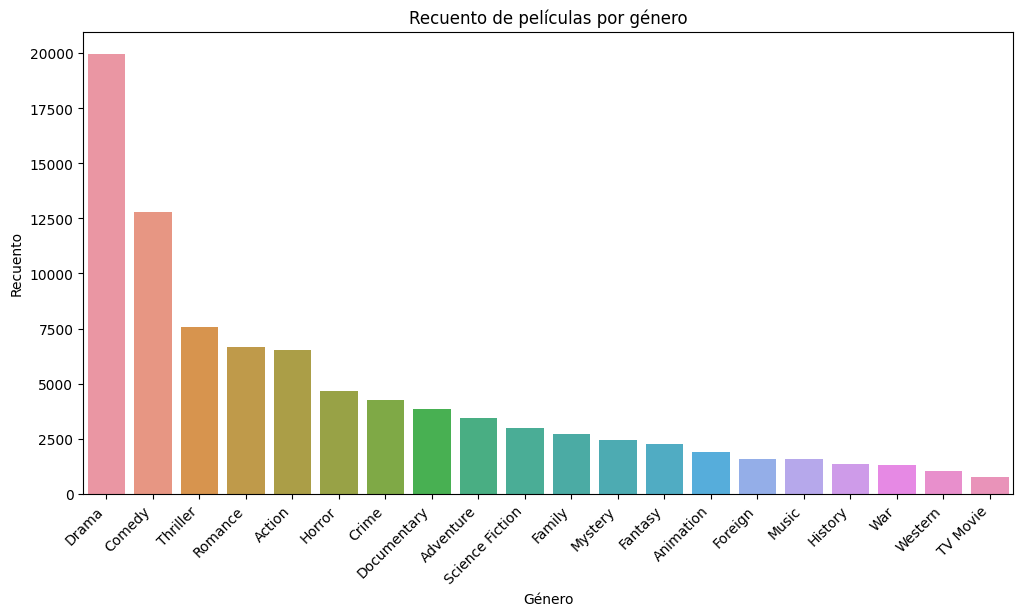

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=generos, y=conteos, ax=ax)

ax.set_title('Recuento de películas por género')
ax.set_xlabel('Género')
ax.set_ylabel('Recuento')

plt.xticks(rotation=45, ha='right')

plt.show()

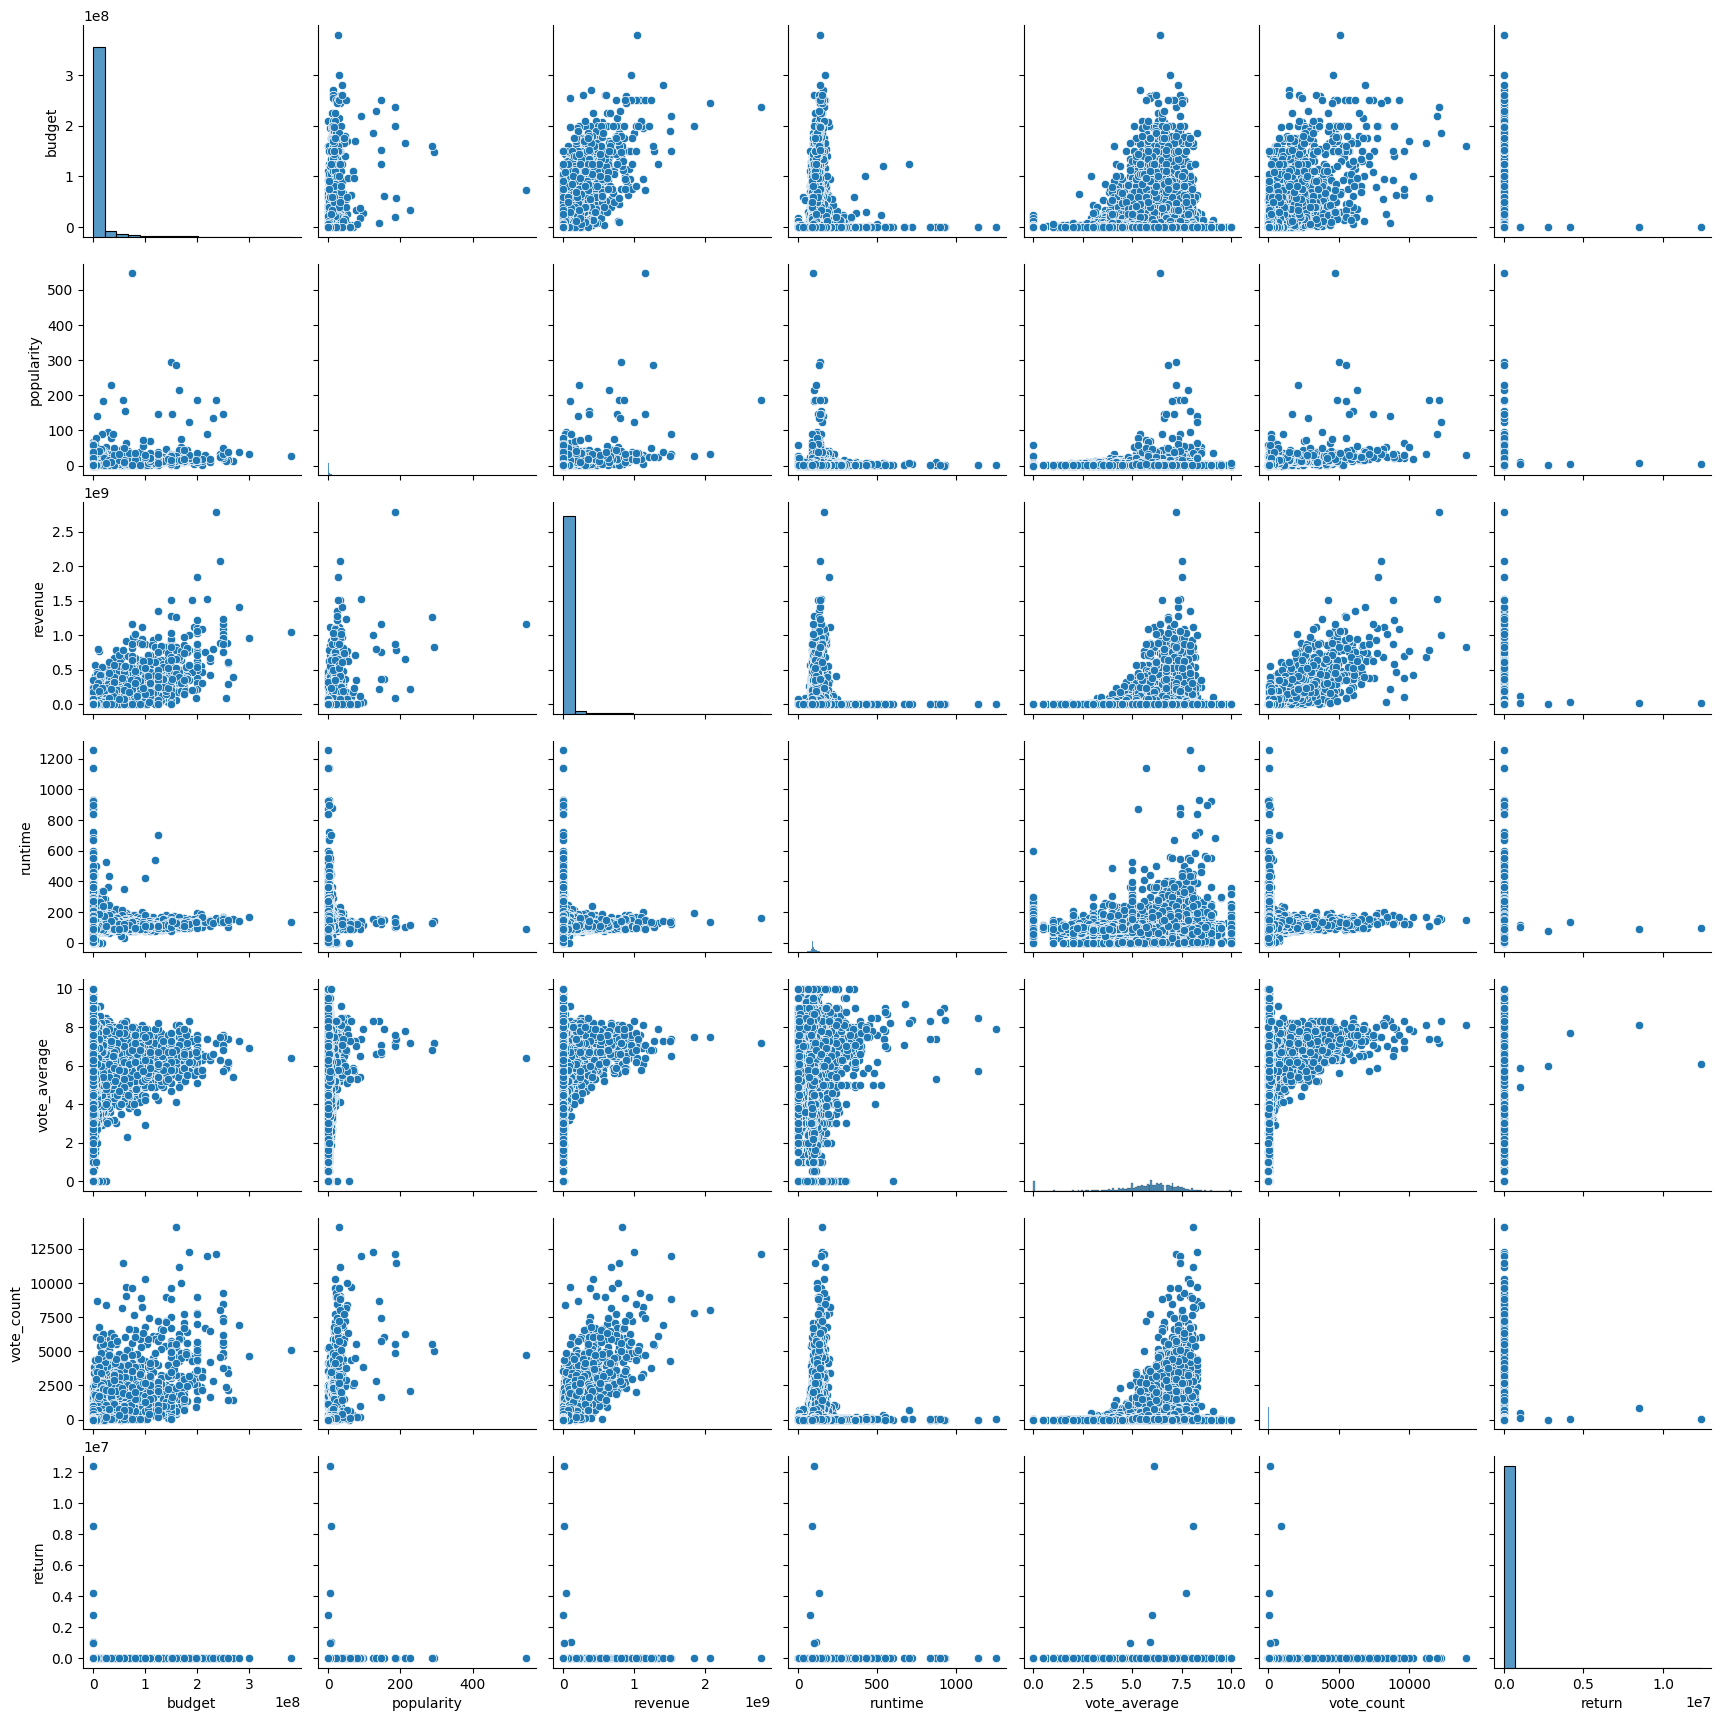

In [25]:
sns.pairplot(data=df_movies.drop(columns=["id","release_year"]))

Análisis Financiero:

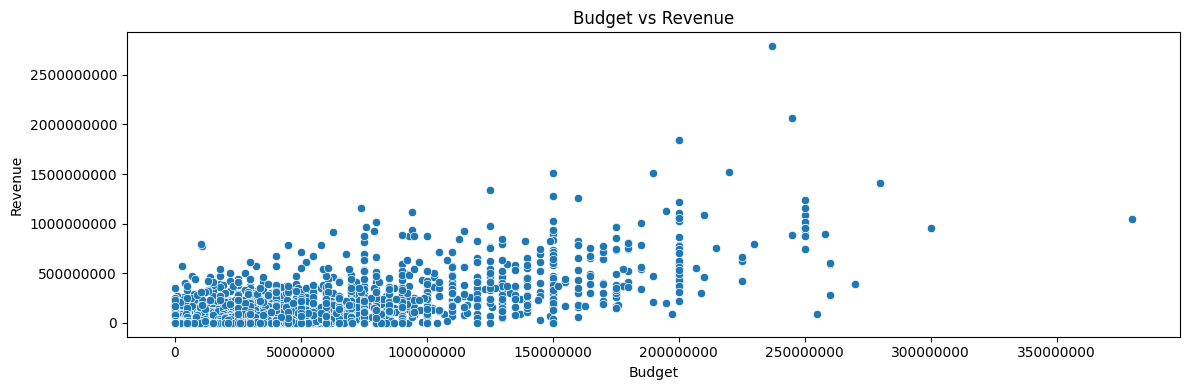

In [26]:
fig = plt.subplots(figsize=(12, 4))

a = sns.scatterplot(x='budget', y='revenue', data=df_movies)
a.set_xlabel("Budget")
a.set_ylabel("Revenue")
a.set_title("Budget vs Revenue")
a.ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

In [27]:
#Resulta interesante analizar cuantos valores en 'budget' son igual cero y que han
#tenido ganancías. 
mask_zero_budget = (df_movies['budget'] == 0)
count_zero_budget = mask_zero_budget.sum()
count_zero_budget

33445

Pensando en que la mejor manera de recomendar sería en función de palabras y generos se preocede indagando los campos de overview, title y genres

Genres

In [28]:
df_movies['genres'].isna().sum()

0

In [29]:
df_movies.shape

(42212, 18)

In [30]:
#Eliminar nulos ya que son pocos datos
df_movies=df_movies.dropna(subset=['genres'])

Vizualizar cuantas peliculas por genero hay:

In [31]:
#Eliminar espacios entre los generos
df_movies['genres'] = df_movies['genres'].str.replace(r'\s*,\s*', ',', regex=True)

In [32]:
lista_generos=[]
for i in df_movies['genres']:
    lista_generos.append(i)

In [33]:
generos = set()  # Conjunto para almacenar palabras únicas

for cadena in lista_generos:
    palabras = cadena.split(',')  # Dividir la cadena en palabras
    generos.update(palabras)  #Unicos
generos_list=list(generos)

In [34]:
conteo_por_genero = {genero: 0 for genero in generos_list}

In [35]:
for lista_generos in df_movies['genres']:
    if isinstance(lista_generos, str):
        for genero in lista_generos.split(','):
            conteo_por_genero[genero] += 1

In [36]:
conteo_por_genero = dict(sorted(conteo_por_genero.items(), key=lambda item: item[1],reverse=True))
conteo_por_genero

{'Drama': 19957,
 'Comedy': 12784,
 'Thriller': 7571,
 'Romance': 6653,
 'Action': 6548,
 'Horror': 4653,
 'Crime': 4259,
 'Documentary': 3873,
 'Adventure': 3448,
 'Science Fiction': 3011,
 'Family': 2717,
 'Mystery': 2443,
 'Fantasy': 2277,
 'Animation': 1905,
 'Foreign': 1591,
 'Music': 1586,
 'History': 1376,
 'War': 1308,
 'Western': 1035,
 'TV Movie': 748}

In [37]:
generos = list(conteo_por_genero.keys())
conteos = list(conteo_por_genero.values())

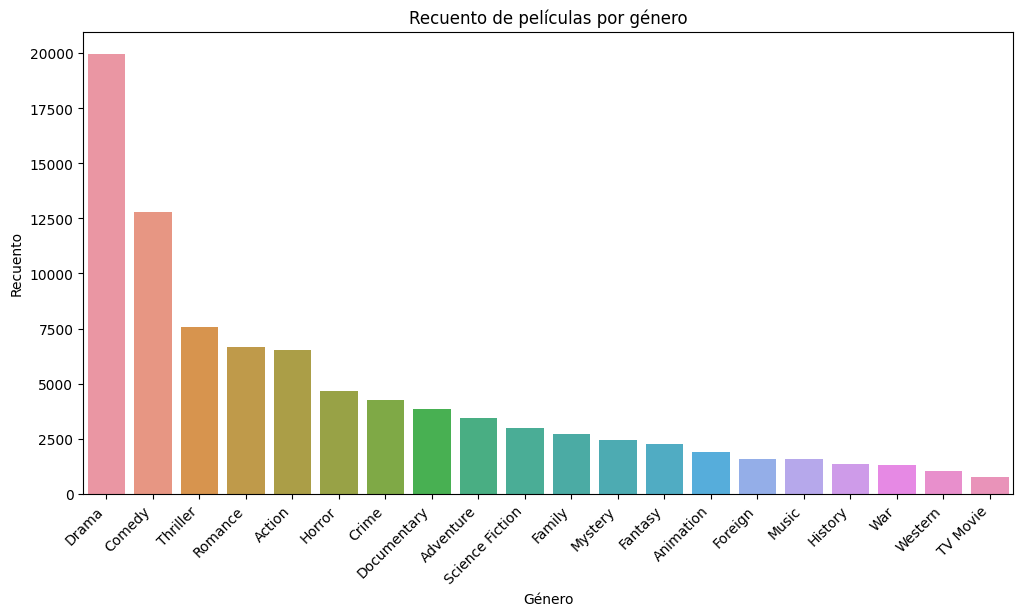

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=generos, y=conteos, ax=ax)

ax.set_title('Recuento de películas por género')
ax.set_xlabel('Género')
ax.set_ylabel('Recuento')

plt.xticks(rotation=45, ha='right')

plt.show()


#### Anális de las peliculas y las fechas de lanzamientos.

<Axes: xlabel='release_year'>

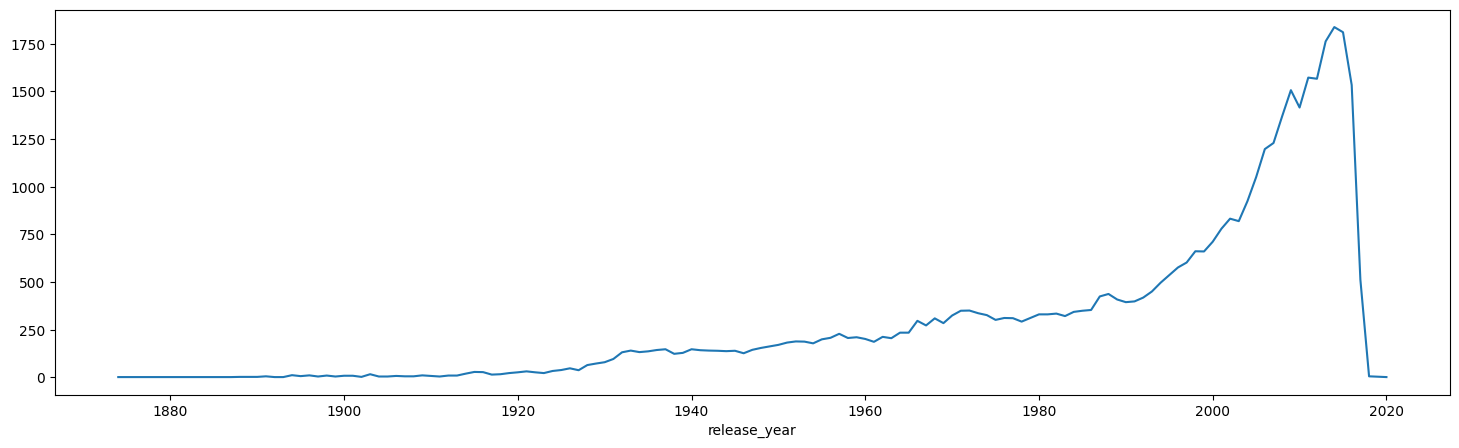

In [40]:
years = df_movies.groupby('release_year')['title'].count()
plt.figure(figsize=(18,5))
years.plot()

In [41]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['Mes'] = df_movies['release_date'].dt.month
df_movies['Día'] = df_movies['release_date'].dt.day_of_week

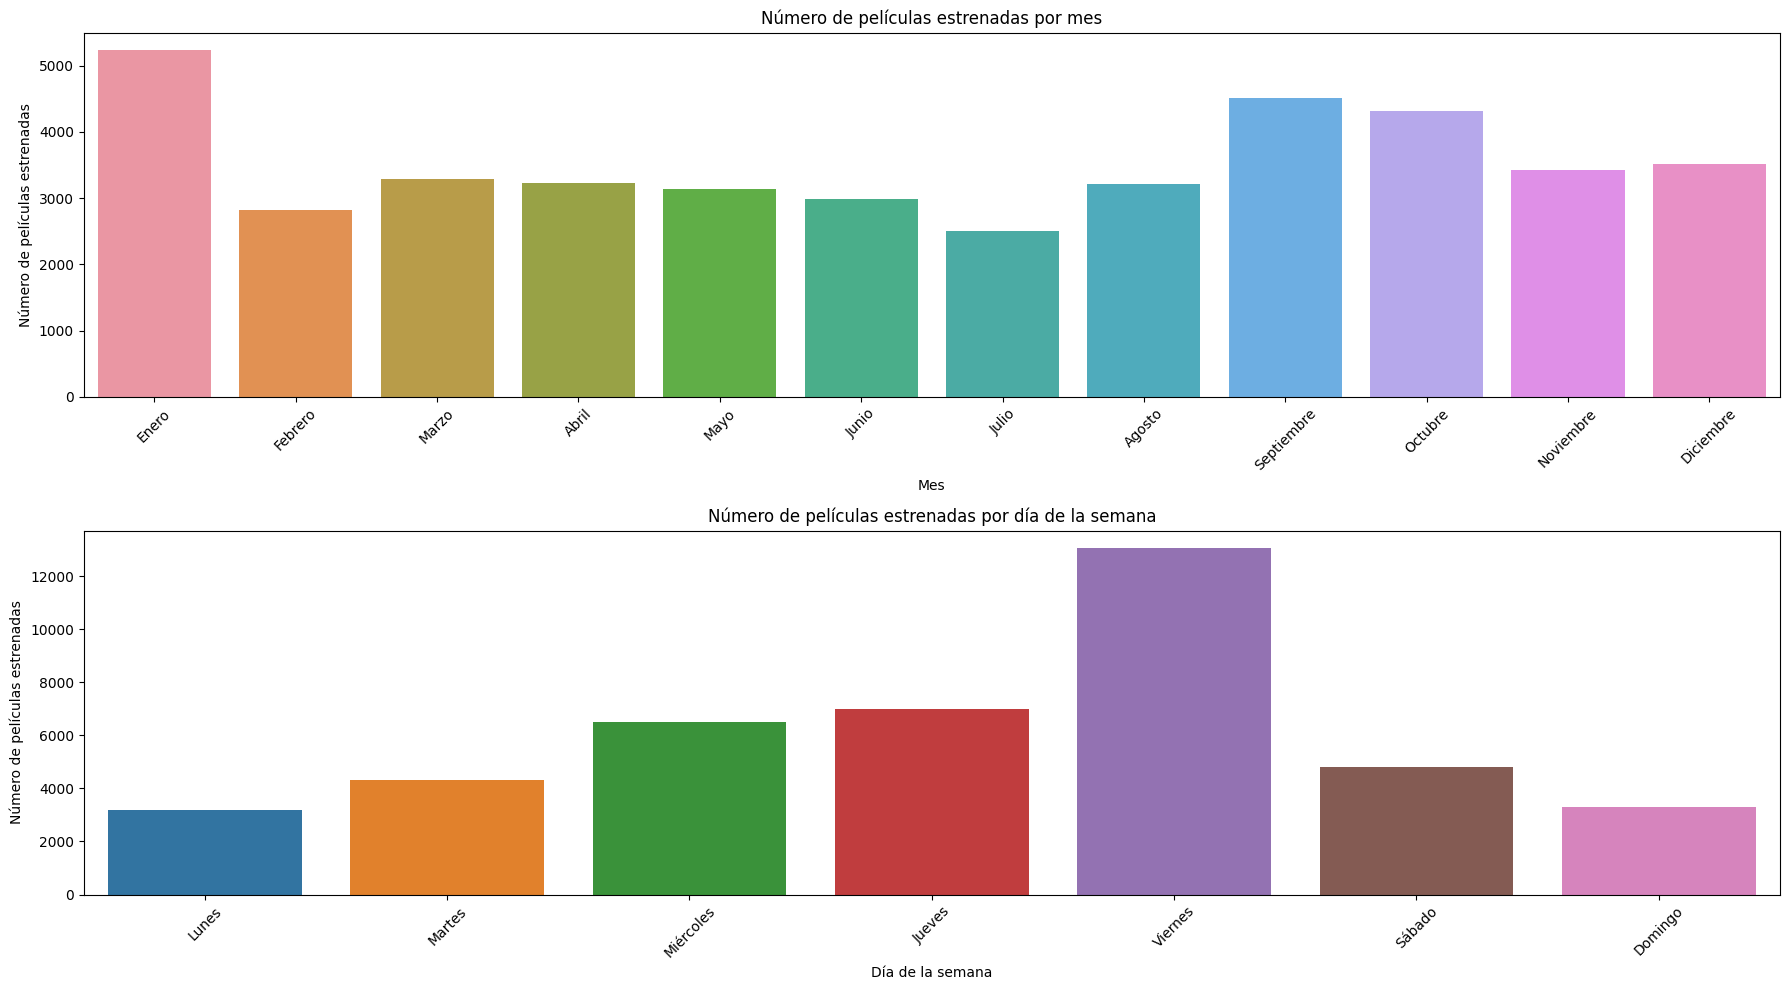

In [43]:
conteo_por_mes = df_movies['Mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
conteo_por_dia = df_movies['Día'].value_counts().sort_index()
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

fig, ax = plt.subplots(2, 1, figsize=(18, 10), sharey=False)

sns.barplot(x=nombres_meses, y=conteo_por_mes, ax=ax[0] )
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Número de películas estrenadas')
ax[0].set_title('Número de películas estrenadas por mes')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x=dias_semana, y=conteo_por_dia, ax=ax[1])
ax[1].set_xlabel('Día de la semana')
ax[1].set_ylabel('Número de películas estrenadas')
ax[1].set_title('Número de películas estrenadas por día de la semana')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()